# Your name: Jack Taylor
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [112]:
# Import packages 
import pandas as pd

import numpy as np

from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt


# Data File Reading Section
## Write code to read in data from external sources here

In [81]:
# Read datasets

air_quality_data = pd.read_csv('data.csv', encoding = 'cp1252')
air_quality_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [109]:
# 1. Statistical Description of data

air_quality_data.describe()

# 2. Displaying number of total rows and columns of the dataset

air_quality_data.shape

# 3. Displaying number of non-null values for each column

air_quality_data.count()

# 4. Displaying number of null values for each column

air_quality_data.isnull().sum()

# 5. Displaying range, column, number of non-null objects of each column, datatype and memory usage

air_quality_data.info()

# 6. Displaying top 10 and bottom 10 records

air_quality_data.head(10)
air_quality_data.tail(10)

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [84]:
# Cleaning up the data

# Dropping columns that aren't required

air_quality_data.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True)

# Dropping rows where no date is available

air_quality_data.dropna(subset=['date'], inplace=True)


In [85]:
# Displaying final columns (data.columns)

air_quality_data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [86]:
# Changing the types to uniform format

air_quality_data.type = air_quality_data.type.replace({ "Residential": "R", 
                                                       "Residential and others": "RO", 
                                                       "Residential, Rural and other Areas": "RRO", 
                                                       "Industrial Area": "I", 
                                                       "Industrial Areas": "I", 
                                                       "Industrial": "I", 
                                                       "Sensitive Area": "S", 
                                                       "Sensitive Areas": "S", 
                                                       "Sensitive": "S", 
                                                       np.nan: "RRO" })

In [87]:
# Display top 10 records after codification of 'types'

air_quality_data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [90]:
# Converting date column to 'datetime' type
air_quality_data.date = pd.to_datetime(air_quality_data.date)

# Extracting year and creating a new column
air_quality_data['year'] = air_quality_data['date'].dt.year

# Top 5 Records
air_quality_data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [111]:
# defining columns of importance, which shall be used reguarly (COLS = ....)

COLS = air_quality_data[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]

# invoking SimpleImputer to fill missing values using 'mean' as the replacement strategy

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

air_quality_data[['so2', 'no2', 'rspm', 'spm', 'pm2_5']] = imp_mean.fit_transform(air_quality_data[['so2', 'no2', 'rspm', 'spm', 'pm2_5']])

# Displaying data.info after the transformation

air_quality_data.info()

# Displaying that there are no more missing values in the dataset

air_quality_data.isnull().sum()



,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.833091,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.833091,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.833091,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01,1990
...,...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,220.78348,40.791467,2015-12-15,2015
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,220.78348,40.791467,2015-12-18,2015
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,220.78348,40.791467,2015-12-21,2015
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,220.78348,40.791467,2015-12-24,2015


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [128]:
# Statewise grouping of median so2

# Table

so2_by_state = air_quality_data[['state', 'so2']].groupby('state', as_index=False).median().sort_values(by='so2')

so2_by_state.head()
so2_by_state.tail()

,state,so2
10,Gujarat,14.2
14,Jharkhand,18.7
27,Sikkim,19.8
31,Uttarakhand,21.0
32,Uttaranchal,25.1


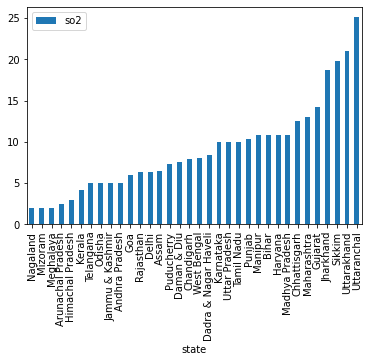

In [129]:
# Bar chart

so2_by_state.plot.bar(x='state', y='so2')

Uttaranchal has the highest SO2 content.

### no2 status

In [144]:
# Statewise grouping of median no2

# Table

no2_by_state = air_quality_data[['state', 'no2']].groupby('state', as_index=False).median().sort_values(by='no2')

no2_by_state.head()
no2_by_state.tail()

,state,no2
1,Arunachal Pradesh,5.000000
21,Mizoram,5.000000
22,Nagaland,7.000000
20,Meghalaya,10.000000
9,Goa,11.600000
24,Puducherry,13.000000
13,Jammu & Kashmir,13.000000
12,Himachal Pradesh,13.900000
16,Kerala,14.000000
2,Assam,14.000000


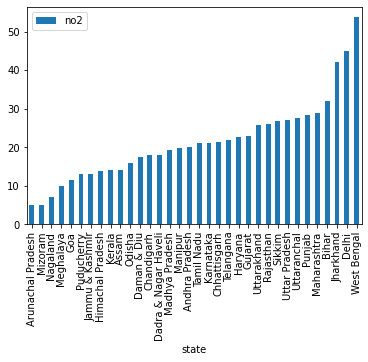

In [133]:
# Bar chart

no2_by_state.plot.bar(x='state', y='no2')

West Bengal has the highest NO2 content.

### rspm status

In [136]:
# Statewise grouping of median rspm

# Table

rspm_by_state = air_quality_data[['state', 'rspm']].groupby('state', as_index=False).median().sort_values(by='rspm')

rspm_by_state.head()
rspm_by_state.tail()

,state,rspm
8,Delhi,136.0
11,Haryana,137.5
25,Punjab,147.0
30,Uttar Pradesh,160.0
14,Jharkhand,165.0


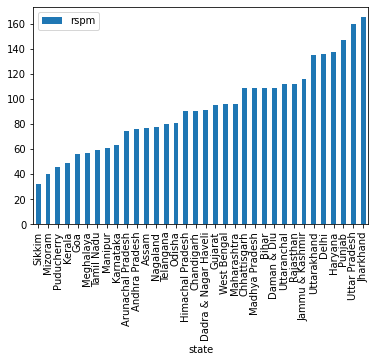

In [137]:
# Bar chart

rspm_by_state.plot.bar(x='state', y='rspm')

Jharkhand has the highest rspm content.

### spm status

In [139]:
# Statewise grouping of median spm

# Table

spm_by_state = air_quality_data[['state', 'spm']].groupby('state', as_index=False).median().sort_values(by='spm')

spm_by_state.head()
spm_by_state.tail()

,state,spm
27,Sikkim,75.0
19,Manipur,120.5
24,Puducherry,191.0
9,Goa,199.0
7,Daman & Diu,200.5


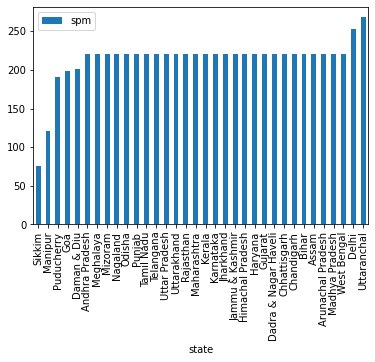

In [140]:
# Bar chart

spm_by_state.plot.bar(x='state', y='spm')

Uttaranchal has the highest spm content.

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [154]:
# Creating a new data frame

Andhra_Pradesh_slice = air_quality_data[air_quality_data.state=='Andhra Pradesh']

Andhra_Pradesh_data = Andhra_Pradesh_slice[['year', 'no2', 'so2', 'rspm', 'spm']].groupby('year').median()

Andhra_Pradesh_data.head()

,no2,so2,rspm,spm
year,,,,
1990,13.6,5.60,108.833091,179.00000
1991,12.8,8.25,108.833091,141.50000
1992,27.6,12.40,108.833091,192.00000
1993,11.4,6.00,108.833091,220.78348
1994,14.2,8.70,108.833091,220.78348


<function matplotlib.pyplot.show>

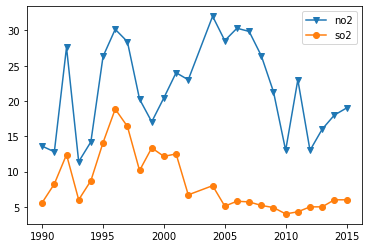

In [172]:
# Displaying yearly trend graph (year vs. value): so2 and no2

plt.plot(Andhra_Pradesh_data.index, Andhra_Pradesh_data['no2'], marker ='v', label='no2')

plt.plot(Andhra_Pradesh_data.index, Andhra_Pradesh_data['so2'], marker = 'o', label='so2')

plt.legend()

plt.show


<function matplotlib.pyplot.show>

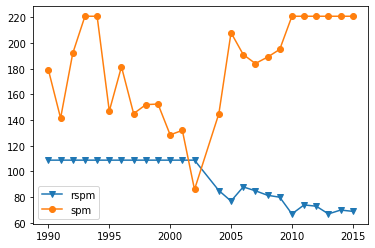

In [174]:
# Displaying yearly trend graph (year vs. value): rspm and spm

plt.plot(Andhra_Pradesh_data.index, Andhra_Pradesh_data['rspm'], marker ='v', label='rspm')

plt.plot(Andhra_Pradesh_data.index, Andhra_Pradesh_data['spm'], marker = 'o', label='spm')

plt.legend()

plt.show

Do you find anything alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. 

From 1990 to 2015, NO2 and SO2 levels have both fluctuated drastically, which gives the impression that the state does not have solid control over the amounts of these particles present in the air from year to year. While the state experienced both recent low-points for NO2 and SO2 levels, both elements are on the rise, so there is some concern if they will continue to increase without the ability to stop it.

In terms of rspm, the state has done a great job at maintaining a consinstent level, while also managing to bring the amount of particles down gradually since 2005. In contrast, spm levels spiked in the early 2000s, and while the state was able to stop spm content from increasing more, they have not been able to bring down the amount of spm particles found in the air for the last 6 years. 

